<a href="https://colab.research.google.com/github/Parreirac/MyMissionPlaner/blob/master/PFR_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploration du dépot arXiv et de l'exploitation de PDF

Ce notebook est une exploration générale du projet fil rouge.
Il s'agit ici de "découvrir" arXiv et l'exploitation directe d'un pdf.

arXiv (https://github.com/lukasschwab/arxiv.py) est une librairie d'interogation du dépôt arXiv qui respecte nativement les contraintes de restriction d'appel. Installons la :

In [1]:
!pip install arXiv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 KB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6065 sha256=5513c2150bd4e4511d9777fb6d9add392985d84d2d91c6b32a3b35de64b24041
  Stored in directory: /root/.cache/pip/wheels/65/7a/a7/78c287f64e401255dff4c13fdbc672fed5efbfd21c530114e1
Successfully built sgmllib3k


# Test sur un petit fichier plutot ancien 
Commencons par un petit et ancien article.

In [2]:
import arxiv

search = arxiv.Search(
    query = "1512.05986"  # pour avoir un petit fichier !
)

# Les informations disponibles via le site arXiv :
for result in search.results():
    print(result.entry_id) # A url http://arxiv.org/abs/{id}.
    print(result.updated) # When the result was last updated.
    print(result.published) # When the result was originally published.
    print(result.title) # The title of the result.
    print(result.authors) # The result's authors, as arxiv.Authors.
    print(result.summary) # The result abstract.
    print(result.comment) # The authors' comment if present.
    print(result.journal_ref) # A journal reference if present.
    print(result.doi) # A URL for the resolved DOI to an external resource if present.
    print(result.primary_category) # The result's primary arXiv category. See arXiv: Category Taxonomy.
    print(result.categories) # All of the result's categories. See arXiv: Category Taxonomy.
    print(result.links) # Up to three URLs associated with this result, as arxiv.Links.
    print(result.pdf_url) # 

http://arxiv.org/abs/1512.05986v1
2015-12-18 15:16:31+00:00
2015-12-18 15:16:31+00:00
Can Pretrained Neural Networks Detect Anatomy?
[arxiv.Result.Author('Vlado Menkovski'), arxiv.Result.Author('Zharko Aleksovski'), arxiv.Result.Author('Axel Saalbach'), arxiv.Result.Author('Hannes Nickisch')]
Convolutional neural networks demonstrated outstanding empirical results in
computer vision and speech recognition tasks where labeled training data is
abundant. In medical imaging, there is a huge variety of possible imaging
modalities and contrasts, where annotated data is usually very scarce. We
present two approaches to deal with this challenge. A network pretrained in a
different domain with abundant data is used as a feature extractor, while a
subsequent classifier is trained on a small target dataset; and a deep
architecture trained with heavy augmentation and equipped with sophisticated
regularization methods. We test the approaches on a corpus of X-ray images to
design an anatomy detectio

Remarquons que si les fichiers disposent d'un identifiant, les auteurs n'en n'ont pas.

Si on va sur le lien de téléchargement, on constate que les auteurs sont données via des liens hypertextes. Par exemple sur le premier : https://arxiv.org/search/cs?searchtype=author&query=Menkovski%2C+V.
Il s'agit d'une recherche sur le nom, parmi les auteurs du domaine computer science. La personne qui soumet l'article, peut fournir son identifiant d'auteur ORCID, mais il n'est pas exposé actuellement. On aura donc des problèmes d'homonymie.


Téléchargeons ce fichier en local.

In [3]:
import requests

filename = './'+result.pdf_url[21:]+'.pdf'

# Envoi d'une requête pour récupérer le contenu du PDF
response = requests.get(result.pdf_url)

# Vérification du statut de la réponse
if response.status_code == 200:
    # Récupération du contenu du PDF et enregistrement dans un fichier local   
    with open(filename, 'wb') as f:
        f.write(response.content)
        print('PDF téléchargé avec succès !')
else:
    print('Impossible de télécharger le PDF. Code d\'erreur:', response.status_code)


PDF téléchargé avec succès !


Passons par une lecture directe du pdf :

In [4]:
!pip install pypdf2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 KB 5.8 MB/s eta 0:00:00


In [5]:
import PyPDF2

page_content = ""
with open(filename, "rb") as pdf_file:
    read_pdf = PyPDF2.PdfReader(pdf_file)
    number_of_pages = len(read_pdf.pages)
    for i in range(number_of_pages):
      page = read_pdf.pages[i]
      # on recupère seulement le texte horizontal (supprime le filigrane)
      page_content = page_content +'\n' + page.extract_text(orientations=0)

print(page_content)


CanPretrainedNeuralNetworksDetectAnatomy?
VladoMenkovski
PhilipsResearch
Eindhoven,Netherlands
vlado.menkovski@philips.comZharkoAleksovski
PhilipsResearch
Eindhoven,Netherlands
zharko.aleksovski@philips.com
Axel Saalbach
PhilipsResearch
Hamburg,Germany
axel.saalbach@philips.coomHannesNickisch
PhilipsResearch
Hamburg,Germany
hannes.nickisch@philips.com
Abstract
Convolutional neural networks demonstrated outstanding e mpirical results in
computervisionandspeechrecognitiontaskswherelabeled trainingdataisabun-
dant. In medical imaging, there is a huge variety of possible imaging modalities
and contrasts, where annotated data is usually very scarce. We present two ap-
proaches to deal with this challenge. A network pretrained i n a different domain
with abundant data is used as a feature extractor, while a sub sequent classiﬁer is
trained on a small target dataset; and a deep architecture tr ained with heavy aug-
mentation and equipped with sophisticated regularization methods. We test the

On constate :
* la première page, les mots du titre sont collés, 
* de même pour les noms d'auteurs et les laboratoires,
* les indices des notes de bas de page sont bons (à la taille près),
* les références apparaissent proprement, mais avec un 2 avant [4], c'est le numéro de page,
* le texte qui termine le document est le tableau qui termine l'article, suivi du numero de la page.


Testons l'OCR par Tesseract :

In [6]:
!pip install PyMuPDF  # pour transformer les pdf en images

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 76.2 MB/s eta 0:00:00


In [7]:
import fitz

# Chemin du fichier PDF à convertir en images
pdf_file = filename

# Configuration de la résolution et du format d'image
resolution = 600
image_format = 'png'
images = []

# Conversion du PDF en images
with fitz.open(pdf_file) as pdf:
    for i, page in enumerate(pdf):
        pix = page.get_pixmap(matrix=fitz.Matrix(resolution/72, resolution/72))  #getPixmap
        num = str(i+1).zfill(2)
        pix.save(f'page_{num}.{image_format}')
        images.append(f'page_{num}.{image_format}')

In [8]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 24 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 kB in 2s (2,805 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/Fro

In [9]:
import pytesseract
import shutil
import os
import random
try:
 from PIL import Image
except ImportError:
 import Image

In [10]:
text = ""
for imageName in images:
    # Extraction du texte de l'image avec Tesseract
    ####img = Image.fromarray(page)
    extracted_text = pytesseract.image_to_string(imageName, lang='eng')

    # Ajout du texte extrait à la variable de stockage
    text += extracted_text

# Affichage du texte extrait
print(text)

 

Can Pretrained Neural Networks Detect Anatomy?

Vlado Menkovski Zharko Aleksovski
Philips Research Philips Research
Eindhoven, Netherlands Eindhoven, Netherlands
vlado.menkovski@philips.com zharko.aleksovski@philips.com

Axel Saalbach Hannes Nickisch
Philips Research Philips Research

Hamburg, Germany Hamburg, Germany

axel.saalbach@philips.coom hannes.nickisch@philips.com
Abstract

Convolutional neural networks demonstrated outstanding empirical results in
computer vision and speech recognition tasks where labeled training data is abun-
dant. In medical imaging, there is a huge variety of possible imaging modalities
and contrasts, where annotated data is usually very scarce. We present two ap-
proaches to deal with this challenge. A network pretrained in a different domain
with abundant data is used as a feature extractor, while a subsequent classifier is
trained on a small target dataset; and a deep architecture trained with heavy aug-
mentation and equipped with sophisticated reg

Sur cet exemple :
* les indices sont perdus, typiquement pour les notes de bas de page;
* les exposants egalement
* les url sont partiellement reconnues. 

Une recherche internet permet de vérifier que les "superscripts & subscripts" doivent faire l'objet d'un entrainement particulier.

Tesseract est neanmoins un bon moyen pour corriger les problèmes de lecture des pdf, mais une lecture PDF demeure utile (on peut par exemple souvent lire toutes les url sans erreur).


Le seul moyen, par exemple pour lire la bibliographie sans polution par les numéros de page, les notes de bas de page, voire même les en-têtes, est de passer par le fichier .tex. Dans notre cas, il est donnée au lien suivant https://arxiv.org/e-print/1512.05986v1. (Via le lien "autres" de la page d'accueil). La difficulté est qu'un peu plus de 15 % des articles ne fournissent pas un tel lien.


# Test sur un fichier recent


Au moment de la rédaction de ce notebook, le fichier le plus récent est http://arxiv.org/abs/2303.18246v1.

In [33]:
search = arxiv.Search(
    #query = "cat:cs.AI", # les articles de la catégorie computer science et de la sous famille AI
    query = "2303.18246", # pour avoir le dernier article cs.AI commentez cette ligne et utilisez celle du dessus.
    max_results = 1, # nous n'allons utiliser ici qu'un seul fichier
    sort_by = arxiv.SortCriterion.SubmittedDate # nous allons prendre le plus récent
)
for result in search.results():
    print(result.entry_id) # A url http://arxiv.org/abs/{id}.
    print(result.updated) # When the result was last updated.
    print(result.published) # When the result was originally published.
    print(result.title) # The title of the result.
    print(result.authors) # The result's authors, as arxiv.Authors.
    print(result.summary) # The result abstract.
    print(result.comment) # The authors' comment if present.
    print(result.journal_ref) # A journal reference if present.
    print(result.doi) # A URL for the resolved DOI to an external resource if present.
    print(result.primary_category) # The result's primary arXiv category. See arXiv: Category Taxonomy.
    print(result.categories) # All of the result's categories. See arXiv: Category Taxonomy.
    print(result.links) # Up to three URLs associated with this result, as arxiv.Links.
    print(result.pdf_url) # 

In [30]:
filename2 = './'+result.pdf_url[21:]+'.pdf'

# Envoi d'une requête pour récupérer le contenu du PDF
response = requests.get(result.pdf_url)

# Vérification du statut de la réponse
if response.status_code == 200:
    # Récupération du contenu du PDF et enregistrement dans un fichier local   
    with open(filename2, 'wb') as f:
        f.write(response.content)
        print('PDF téléchargé avec succès !')
else:
    print('Impossible de télécharger le PDF. Code d\'erreur:', response.status_code)


PDF téléchargé avec succès !


In [31]:
page_content = ""
with open(filename2, "rb") as pdf_file:
    read_pdf = PyPDF2.PdfReader(pdf_file)
    number_of_pages = len(read_pdf.pages)
    for i in range(number_of_pages):
      page = read_pdf.pages[i]
      page_content = page_content +'\n' + page.extract_text(orientations=0)

print(page_content)


3D Human Pose Estimation via Intuitive Physics
Shashank Tripathi1Lea M ¨uller1Chun-Hao P. Huang1Omid Taheri1
Michael J. Black1Dimitrios Tzionas2*
1Max Planck Institute for Intelligent Systems, T ¨ubingen, Germany2University of Amsterdam, the Netherlands
{stripathi, lmueller2, chuang2, otaheri, black }@tue.mpg.de d.tzionas@uva.nl
Unstable Poses
Floor Penetration Floating Bodies
Figure 1. Estimating a 3D body from an image is ill-posed. A recent, representative, optimization method [64] produces bodies that are in
unstable poses, penetrate the floor, or hover above it. In contrast, IPMAN estimates a 3D body that is physically plausible . To achieve this,
IPMAN uses novel intuitive-physics (IP) terms that exploit inferred pressure heatmaps on the body, the Center of Pressure (CoP), and the
body’s Center of Mass (CoM). Body heatmap colors encode per-vertex pressure.
Abstract
Estimating 3D humans from images often produces im-
plausible bodies that lean, float, or penetrate the floor. Such

Le début de l'article est comme suit :


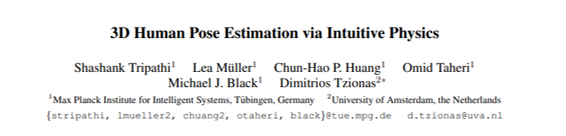

L'extraction est très différente :

3D Human Pose Estimation via Intuitive Physics

Shashank Tripathi1Lea M ¨uller1Chun-Hao P. Huang1Omid Taheri1

Michael J. Black1Dimitrios Tzionas2*

1Max Planck Institute for Intelligent Systems, T ¨ubingen, 

Germany2University of Amsterdam, the Netherlands

{stripathi, lmueller2, chuang2, otaheri, black }@tue.mpg.de d.tzionas@uva.nl

La récupération des affiliations est donc une tache complexe (outre les problèmes d'accentuation...).

Sur les références (bibliographie), l'extraction est très propre avec seulement quelques numéro de pages qui apparaissent.
On observe des liens vers le corps du document (ce qui est inabituel).

# Métadonnées des fichiers pdf

In [14]:
def printMetadata(file):
  with open(file, "rb") as pdf_file:
    read_pdf = PyPDF2.PdfReader(pdf_file)
    for k,v in read_pdf.metadata.items():
      print(k,v)

In [15]:
printMetadata(filename)
print('\n')
printMetadata(filename2)

/Producer dvips + GPL Ghostscript GIT PRERELEASE 9.22
/CreationDate D:20180910172622-04'00'
/ModDate D:20180910172622-04'00'
/Creator LaTeX with hyperref package
/Title 
/Subject 
/Author 
/Keywords 


/Author Alexander Pan, Chan Jun Shern, Andy Zou, Nathaniel Li, Steven Basart, Thomas Woodside, Jonathan Ng, Hanlin Zhang, Scott Emmons, Dan Hendrycks
/CreationDate D:20230407003240Z
/Creator LaTeX with hyperref
/Keywords machine ethics, ai safety, text-based reinforcement learning, alignment
/ModDate D:20230407003240Z
/PTEX.Fullbanner This is pdfTeX, Version 3.14159265-2.6-1.40.21 (TeX Live 2020) kpathsea version 6.3.2
/Producer pdfTeX-1.40.21
/Subject Proceedings of the International Conference on Machine Learning 2023
/Title Do the Rewards Justify the Means? Measuring Trade-Offs Between  Rewards and Ethical Behavior in the Machiavelli Benchmark
/Trapped /False


Malheureusement, les métadonnées sont globalement inutilisées.

In [16]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
!pip install spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
# URL READ (TEMP)

import urllib.request as libreq
from pprint import pprint

with libreq.urlopen('https://arxiv.org/ftp/arxiv/papers/2201/2201.05599.pdf') as url:
    r = url.read()

#pprint(r)

In [19]:
pprint(r)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
 b'\xdd!\xdd\x8d\n\xb6\xd2\x88\xcf\xe3\x92\xdd&\x97\xe26\xbbT\xb7\xc5'
 b'\xa5\xb9\xad.\xddms\x19n\xbb\xcbt;\\\x96\xdb\xe9&\xb8].\xdb\xedv9n\x8f\x9b'
 b'\xe8\xf6\xbaIn\x9f\x9b\xec\xf6\xbb)\xee\x80\x9b\xea\x0e\xbai\xee\x90'
 b'\x9b\xee\x0e\xbb\x99\xee\x88\x9b\xe5\x8e\xba\xd9\xee\x98\x9b\xe3'
 b'\x8e\xbb\xb9\xee\x84\x9b\xe7N\xba\xf9\xee\x94\xcbug\xdcBw\xd6-r\xe7\xdcb'
 b'w\xde-q\x17\xf2\xf5\xca\xf7\xc0-u\x17\xdd2w\xc9-w\x97\xc3y\xe1u'
 b'\xe1\xf5\xe1\r\xe1\x8d\xe1M\xea\xa2\x1e\xea\xa6^\xea\xaa\x9e\xea\xae\xde'
 b'\xb1wb\x1f\xc4\xde\x8b\xfd7\xf6n\xec\xc3\xd8\xfb\xb1\x8f4V\t\x1a\xa7D\xc5'
 b'k\xbc\xa4\xc2*\xa4"\n\xc9W\x8a2\x94\xa6,\xa5*S\xe9\x9a\xa0\xa2zFO\xeb9\x15'
 b'\xd3\xb3*\xae\x12\x9a\xa7\x85Z\xa0\xc5\x9a\xafE\xca\xd5\x12UU\r'
 b'\xc5\xa9\x96\xaa\xa9\xa6\xaa\xab\xb6\xd6j\xbd\xd6i\xa3\xf2\xb4A\xf5\xd5'
 b'P\r\xd4Xo\xa8\x91\xb6i\x97vh\x8f\xb6k\xb7vj\xafZ\xe8\xa8N\xea\xb8N\xeb\x98'
 b'N\xe9\x84\xce\xa8\xad:\xa

In [20]:
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=a9483b6b03c5ae7d8bf3b66fd44b1192cf7ed76c56ba3bed7601e642c4c2eef8
  Stored in directory: /root/.cache/pip/wheels/04/5f/3e/46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget


In [21]:
import wget

file = wget.download("https://arxiv.org/pdf/2201.05464.pdf")
print(file)

2201.05464.pdf


In [22]:
# PDF Download

import urllib
urllib.request.urlretrieve('https://arxiv.org/pdf/2201.05464', "new_file.pdf")

('new_file.pdf', <http.client.HTTPMessage at 0x7fa96acb4d60>)

In [23]:
# PDF TO TEXT

from PyPDF2 import PdfFileReader
import pdftotext

# Extracting meta data
with open("new_file.pdf", "rb") as file:
    data = pdftotext.PDF(file)
    pdf = PdfFileReader(file)
    info = pdf.getDocumentInfo()
    number_of_pages = pdf.getNumPages()
    author = info.author
    creator = info.creator
    producer = info.producer
    subject = info.subject
    title = info.title

print("Info:", info)
print("Pages count:", number_of_pages)
print("Author:", author)
print("Creator:", creator)
print("Producer:", producer)
print("Subject:", subject)
print("Title:", title)
pdf_content = "\n".join(data)
print("Content:", pdf_content)

ModuleNotFoundError: ignored

In [ ]:
# Bag of words

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#sentence_1="This is a good job.I will not miss it for anything"
#sentence_2="This is not good at all"

CountVec = CountVectorizer(ngram_range=(1,1), # to use bigrams ngram_range=(2,2)
                           stop_words='english')
#transform
#Count_data = CountVec.fit_transform([sentence_1,sentence_2])
Count_data = CountVec.fit_transform([pdf_content])

#create dataframe
cv_dataframe=pd.DataFrame(Count_data.toarray(),columns=CountVec.get_feature_names())
print(cv_dataframe)

In [ ]:
import nltk
from nltk.tag.stanford import NERTagger
st = NERTagger('stanford-ner/all.3class.distsim.crf.ser.gz', 'stanford-ner/stanford-ner.jar')
text = pdf_content

for sent in nltk.sent_tokenize(text):
    tokens = nltk.tokenize.word_tokenize(sent)
    tags = st.tag(tokens)
    for tag in tags:
        if tag[1]=='PERSON': print(tag)

In [ ]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
from pprint import pprint
nlp = en_core_web_sm.load()

In [ ]:
doc = nlp('European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices')
pprint([(X.text, X.label_) for X in doc.ents])

In [ ]:
pprint([(X, X.ent_iob_, X.ent_type_) for X in doc])

In [ ]:
from bs4 import BeautifulSoup
import requests
import re

In [ ]:
def url_to_string(url):
    res = requests.get(url)
    html = res.text
    soup = BeautifulSoup(html, 'html5lib')
    for script in soup(["script", "style", 'aside']):
        script.extract()
    return " ".join(re.split(r'[\n\t]+', soup.get_text()))

In [ ]:
ny_bb = url_to_string('https://www.nytimes.com/2018/08/13/us/politics/peter-strzok-fired-fbi.html?hp&action=click&pgtype=Homepage&clickSource=story-heading&module=first-column-region&region=top-news&WT.nav=top-news')
#article = nlp(ny_bb)
article = nlp(pdf_content)
len(article.ents)

In [ ]:
labels = [x.label_ for x in article.ents]
Counter(labels)

In [ ]:
items = [x.text for x in article.ents]
Counter(items).most_common(3)

In [ ]:
sentences = [x for x in article.sents]
print(sentences[20])

In [ ]:
displacy.render(nlp(str(sentences[20])), jupyter=True, style='ent')
#displacy.render(nlp(str(sentences)), jupyter=True, style='ent')

In [ ]:
#displacy.render(nlp(str(sentences[20])), style='dep', jupyter = True, options = {'distance': 120})
displacy.render(nlp(str(sentences)), style='dep', jupyter = True, options = {'distance': 120})

In [ ]:

[(x.orth_,x.pos_, x.lemma_) for x in [y 
                                      for y
                                      in nlp(str(sentences)) 
                                      if not y.is_stop and y.pos_ != 'PUNCT']]

In [ ]:
dict([(str(x), x.label_) for x in nlp(str(sentences)).ents])

In [ ]:
print([(x, x.ent_iob_, x.ent_type_) for x in sentences[20]])

In [ ]:
displacy.render(article, jupyter=True, style='ent')